In [1]:
import sys
try:
    sys.path.remove("\\\\?\\C:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking")
except ValueError:
    pass
import gpu_tracking
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
import trackpy as tp
arr = tifffile.imread("../../emily_tracking/sample_vids/s_20.tif").astype("float32")#[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
from scipy.spatial import KDTree
# with open("centers.bin", "rb") as file:
#     data = file.read()
# last_dim = 2
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# with open("test", "rb") as file:
#     data = file.read()
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, 2)
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# plt.imshow(centers[:, :, 0])

ModuleNotFoundError: No module named 'gpu_tracking'

In [5]:
sys.path

['c:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking\\testing',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\python38.zip',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\DLLs',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script',
 '',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\win32',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\Pythonwin',
 '/home/qzj517/POR-DD/scripts',
 '/home/qzj517/POR-DD/EquiBind']

In [6]:
import gpu_tracking

ImportError: cannot import name 'batch_rust' from 'gpu_tracking.gpu_tracking' (c:\Users\andre\anaconda3\envs\tracking-script\lib\site-packages\gpu_tracking\gpu_tracking\__init__.py)

In [4]:
sys.path

['c:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking\\testing',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\python38.zip',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\DLLs',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script',
 '',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\win32',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages\\Pythonwin',
 '/home/qzj517/POR-DD/scripts',
 '/home/qzj517/POR-DD/EquiBind']

In [8]:
r'c:\Users\andre\anaconda3\envs\tracking-script\lib\site-packages'.replace(r"\", r"\.")

'c:\\Users\\andre\\anaconda3\\envs\\tracking-script\\lib\\site-packages'

In [2]:
# with open("trackpy_reference/locations.pkl", "rb") as file:
#     tp_df = pickle.load(file)
diameter = 9
minmass = 0
separation = 10
# n_frames = 2000
slc = slice(0, 2000)
my_df = pd.DataFrame(gpu_tracking.batch(arr[slc], diameter, minmass = minmass, separation = separation, filter_close = True), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]
tp.quiet()
tp_df = tp.batch(arr[slc], diameter, threshold = 0, percentile = 0, minmass = minmass, characterize = False, separation = separation)


In [3]:
errors = []
for (frame, my_subdf), (frame, tp_subdf) in zip(my_df.groupby("frame"), tp_df.groupby("frame")):
    idk = my_subdf.sort_values("y").reset_index(drop = True) - tp_subdf.sort_values("y").reset_index(drop = True)
    error = np.sqrt((idk[["y", "x"]]**2).sum(axis = 1)).sum()/len(my_subdf)
    if error > 1:
        errors.append((my_subdf, tp_subdf))
len(errors)

2000

In [4]:
it = iter(errors)

5 5


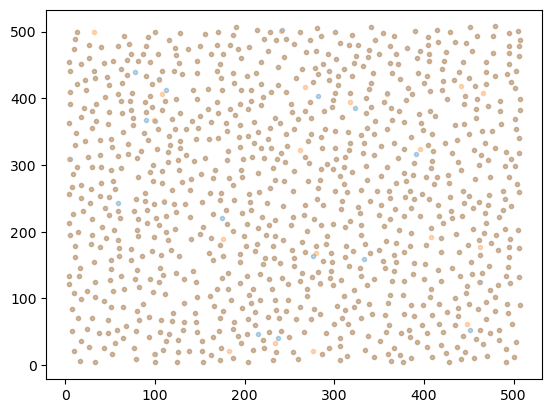

In [10]:
my_subdf, tp_subdf = next(it)
print(my_subdf["frame"].iloc[0], tp_subdf["frame"].iloc[0])
# my_coords = coords(my_df[my_df["frame"] == f])
# tp_coords = coords(tp_df[tp_df["frame"] == f])
my_coords = coords(my_subdf)
tp_coords = coords(tp_subdf)

my_tree = KDTree(my_coords.T)
tp_tree = KDTree(tp_coords.T)
# print(my_tree.query(tp_coords.T, distance_upper_bound = 0.2)[0].sum())
# print(tp_tree.query(my_coords.T, distance_upper_bound = 0.2)[0].sum())
plt.plot(*my_coords, "C0.", alpha = 0.3)
plt.plot(*tp_coords, "C1.", alpha = 0.3)
# plt.plot(idk[0], idk[1], ".")

In [20]:
idk[0], idk[1]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [26]:
idk

(array([2.73705328e-06, 7.14660826e-06, 1.99054926e-06, ...,
        1.10177297e-05, 1.22248076e-05, 7.48332912e-06]),
 array([ 845,  901,  775, ...,  961, 1151,  427], dtype=int64))

In [85]:
tp_inds

(array([1, 7], dtype=int64),)

In [84]:
tp_coords.T[tp_inds]

array([[  4.59905321, 270.10897424],
       [  4.20060421, 235.99601816]])

In [87]:
tp_inds

(array([1, 7], dtype=int64),)

In [88]:
my_inds

(array([609, 864, 893], dtype=int64),)

In [48]:
np.isinf(my_dists)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
(my_df.groupby("frame").count() - tp_df.groupby("frame").count()).abs().sum()

y       31
x       31
mass    31
dtype: int64

In [11]:
(my_df[["x", "y"]] > 511).sum()

x    2
y    2
dtype: int64

In [10]:
(my_df[["x", "y"]] < 0).sum()

x    4
y    1
dtype: int64

In [11]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,11.185135,227.674576,701.138489
3,0,11.741593,349.500702,811.161987
4,0,11.922229,341.975342,747.229126
...,...,...,...,...
644,0,497.107788,190.423584,787.688293
645,0,496.959900,248.419052,968.822021
646,0,498.052063,355.679932,802.113403
647,0,498.293976,392.127533,709.902344


In [19]:
tp.masks.gaussian_kernel(1, 4)[:, None]

array([[-0.99986617],
       [-0.99556814],
       [-0.94600887],
       [-0.75802855],
       [-0.60105653],
       [-0.75802855],
       [-0.94600887],
       [-0.99556814],
       [-0.99986617]])

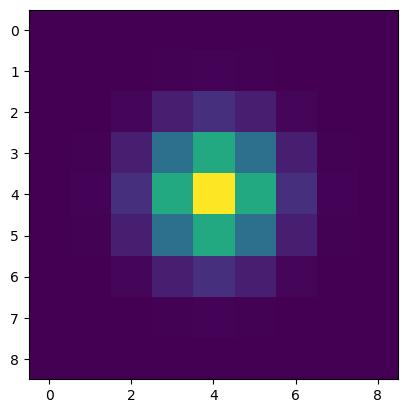

In [18]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None] * tp.masks.gaussian_kernel(1, 4)[None, :])

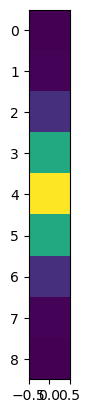

In [14]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None])

In [10]:
print(len(my_df))
print(len(tp_df))

1151
1103


In [12]:

# my_tree.query_ball_tree(tp_tree, 0.05)

In [13]:
print((dists != np.inf).sum())
dists[dists != np.inf]
inds[dists != np.inf]
pass

948


In [15]:
it = enumerate(iter(coords(tp_df).T[dists == np.inf]))

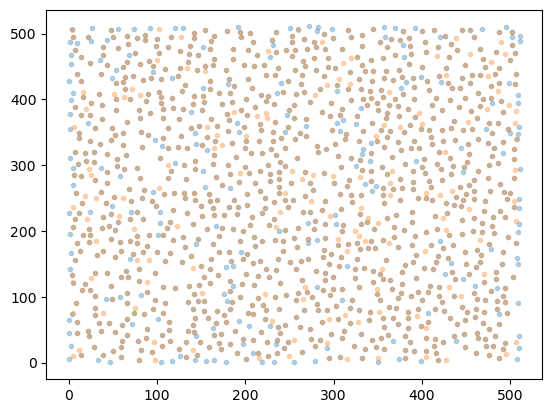

In [14]:
3//2

1

In [ ]:
tp_df

,y,x,mass
0,4.220573,74.692416,1054.478337
1,4.599053,270.108974,737.670025
2,4.623336,494.512906,1009.522685
3,5.025773,9.336279,922.702762
4,4.810352,121.785098,638.806371
...,...,...,...
1271,506.159615,181.958809,646.392449
1272,506.280800,214.909562,450.154686
1273,507.019594,339.288914,534.375697
1274,506.581047,381.735925,713.557145


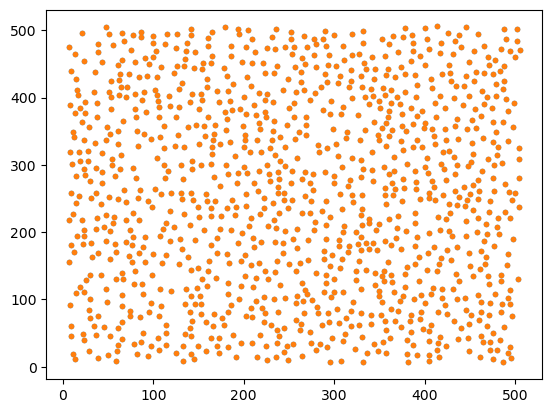

In [ ]:
plt.plot(*coords(my_df).T[inds[dists != np.inf]].T, ".", alpha = 1)
plt.plot(*coords(tp_df).T[dists != np.inf].T, ".", alpha = 1)